<a href="https://colab.research.google.com/github/jaydeepjadav/EDA--google-play-store-data/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile price Range Prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -** Jaydeep Jadav


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [92]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [93]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
df = pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [95]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [96]:
# Dataset Rows & Columns count
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [97]:
df.shape

(2000, 21)

### Dataset Information

In [98]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [99]:
# Dataset Duplicate Value Count
duplicate = df[df.duplicated()]
print('duplicate rows:')
duplicate

duplicate rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


#### Missing Values/Null Values

In [100]:
import missingno as msno

In [101]:
# Missing Values/Null Values Count
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

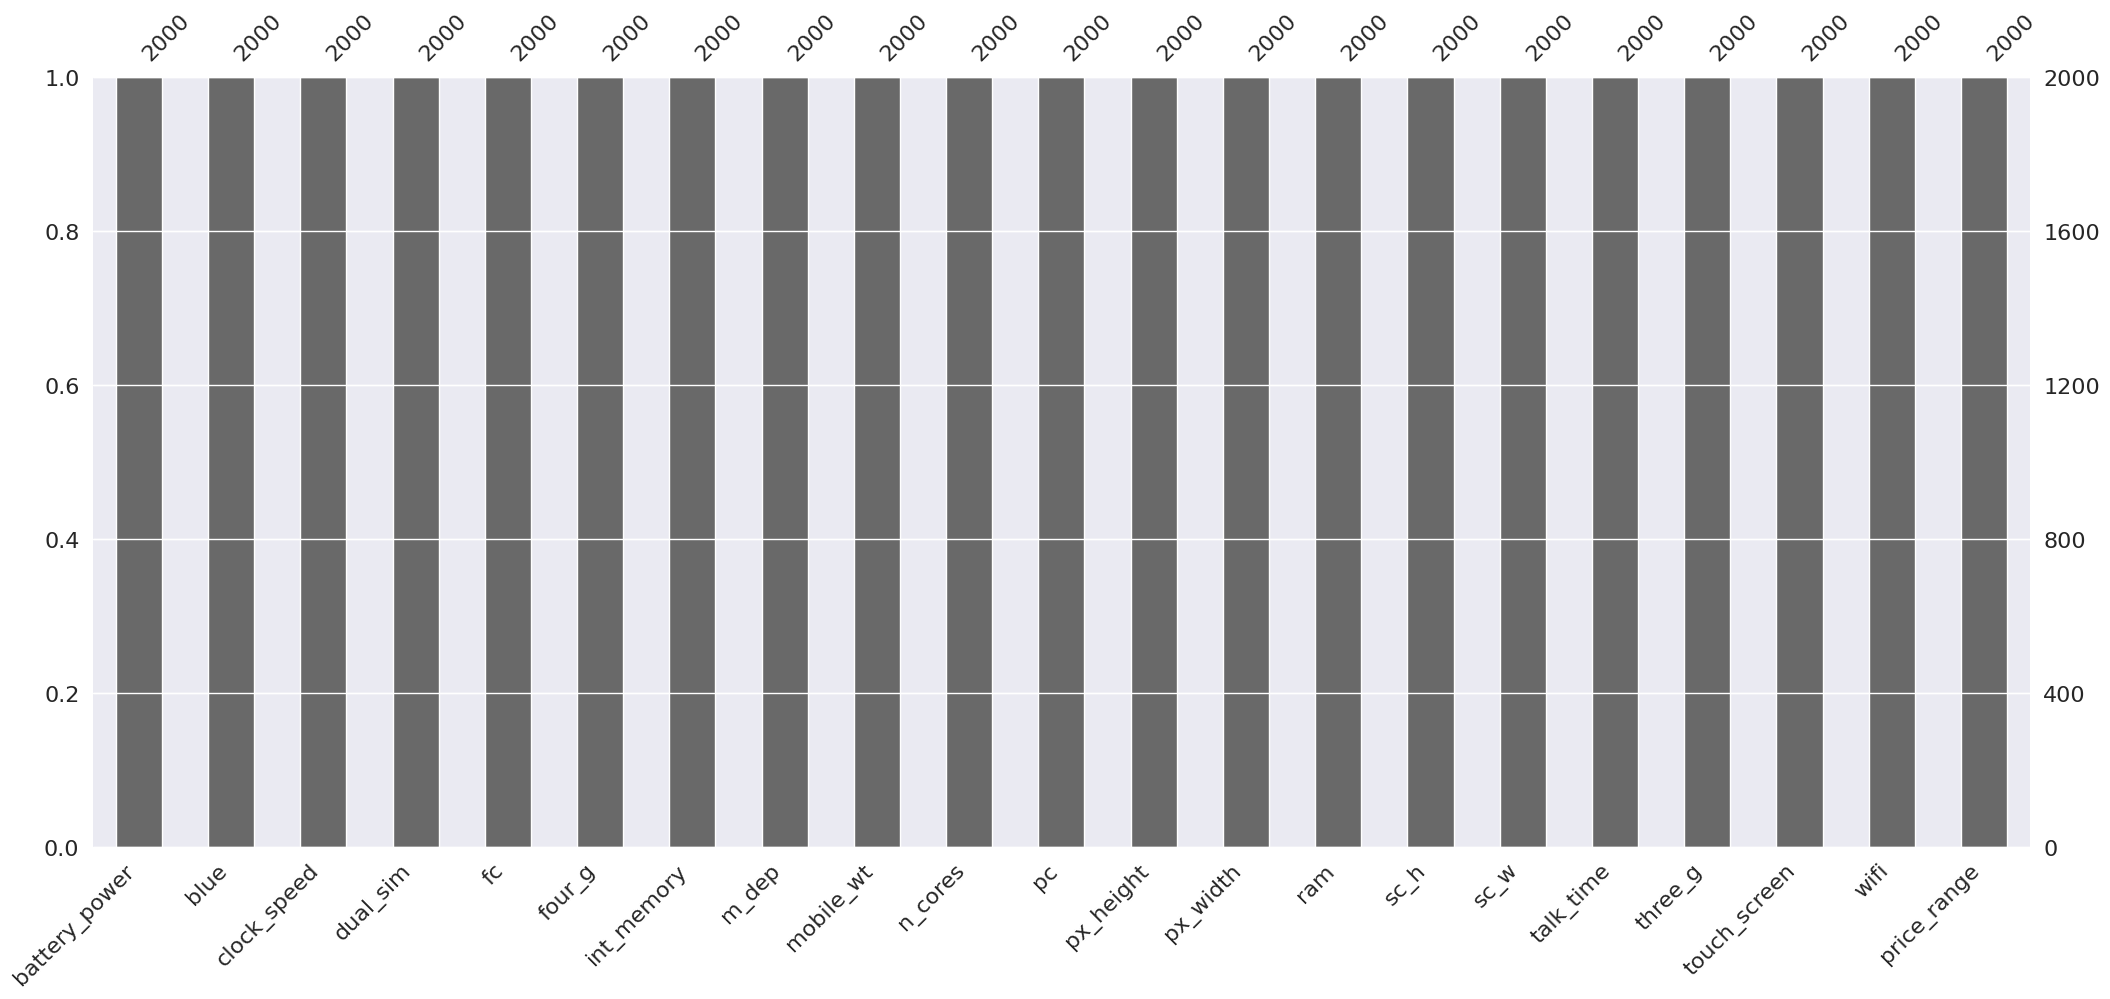

In [102]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [103]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [104]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

**Battery power**- Battery capacity in mAh

**Blue**- Has bluetooth or not

**Clock speed**- speed at which microprocessor executes instructions

**Dual sim**- Has dual sim support or not

**Fc**- Front Camera megapixels

**Four g**- Has 46 or not

**Int memory**- Internal memory capacity

**M_dep**- Mobile depth in cm

**Mobile_wt**- Weight of mobiles phone

**N_cores**- Number of cores in processor

**Pc**- Primary Camera mega pixels

**Pheight**- Pixel resolution height

**Px width**- Pixel resolution width)

**Ram**- Random Access Memory in MB

**Sc_h**- Screen Height

**Sc w-** Screen width

**Talk time**- Longest that a single battery can last over a call

**Three g**- Has 3g or not

**Wifi**- Has wifi or not

***Price range***- This is the target Variable, price to be set for phones



### Check Unique Values for each variable.

In [105]:
# Check Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [106]:
# Write your code to make your dataset analysis ready.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


sc_w and px_height have min value 0 which cannot be possible


In [107]:
#checking for duplicates
print(len(df[df['sc_w']==0]))
print(len(df[df['px_height']==0]))

180
2


 there are 180 rows of sc_w and 2 rows of px_height with value 0

In [108]:
#replacing all zero values with the mean values of the feature
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

<ipython-input-108-d5cae8cce791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
<ipython-input-108-d5cae8cce791>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


Checking for outliers

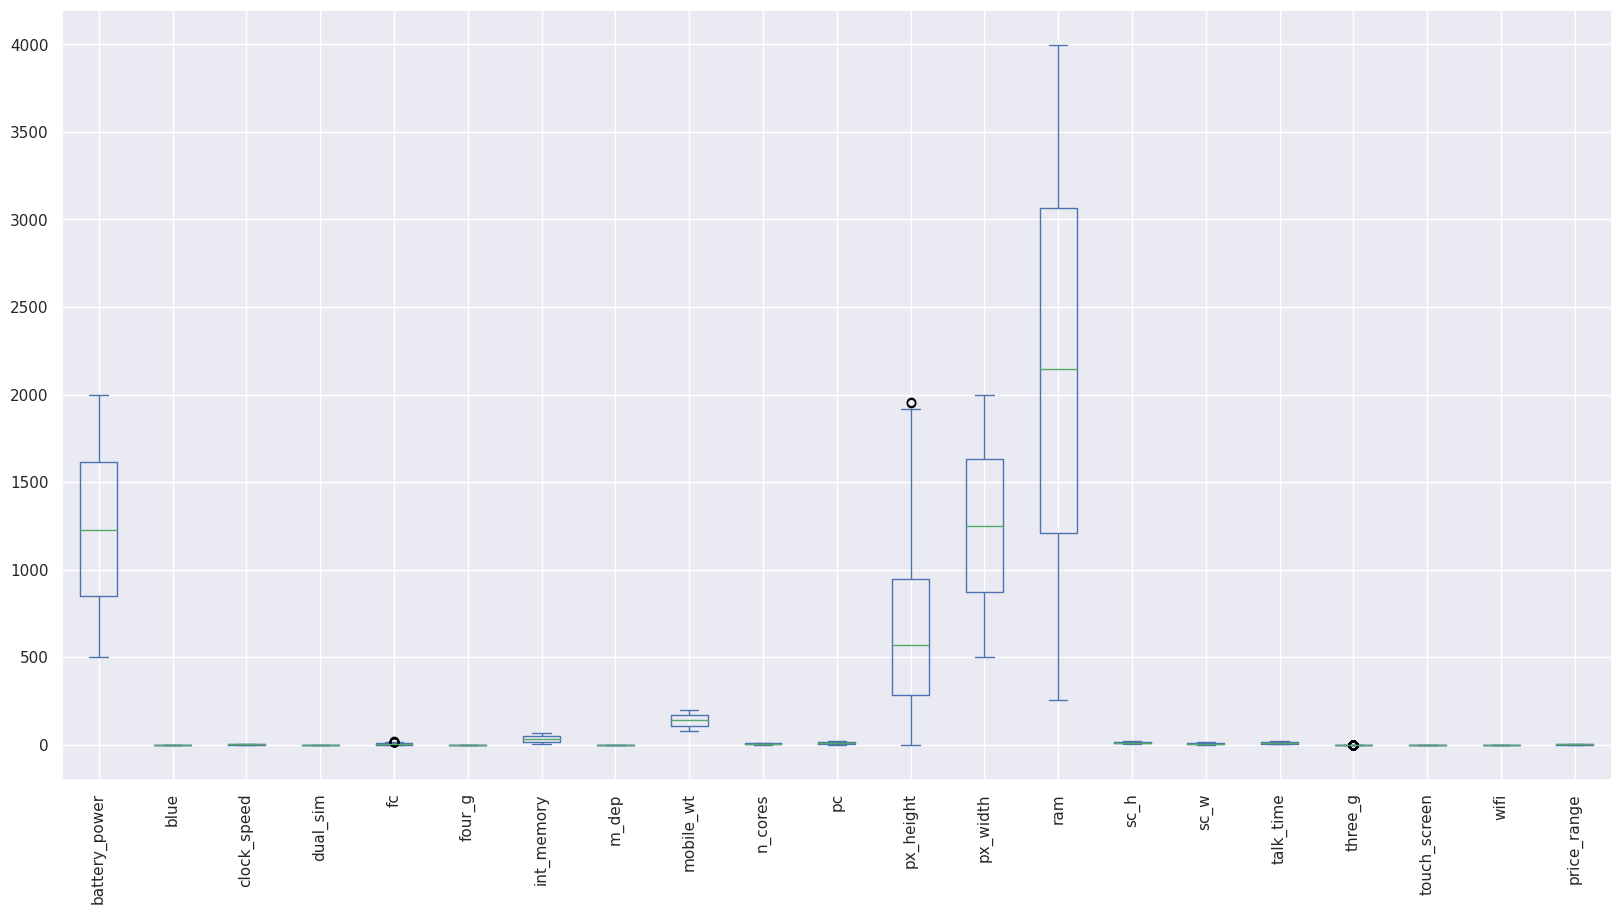

In [110]:
h =  df.plot(kind='box',figsize = (20,10))
h.set_xticklabels(labels=df,rotation=90)
plt.show()

looking at describe function and box plot there isn't much outliers to be treated

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

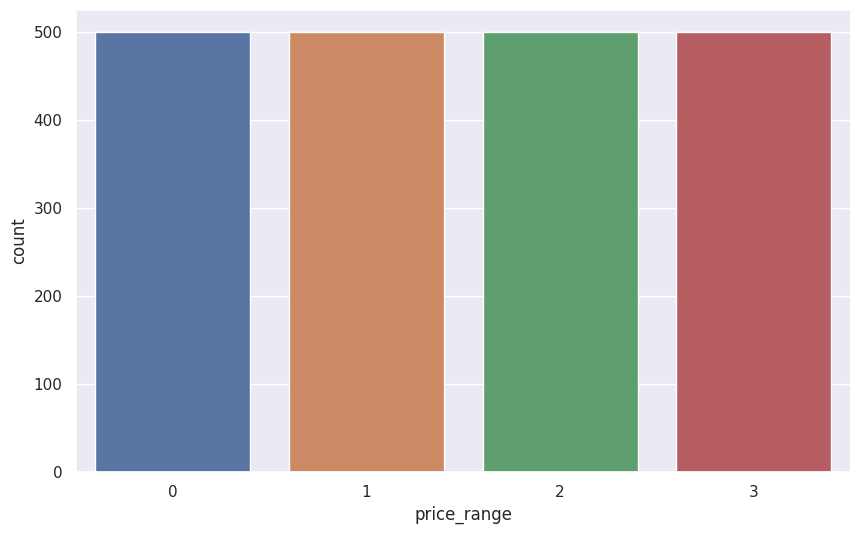

In [111]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
chart1 = sns.countplot(x=df['price_range'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

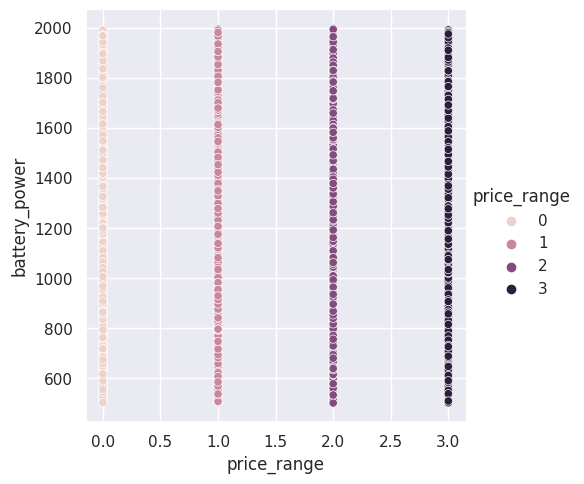

In [112]:
# Chart - 2 visualization code
chart2 = sns.relplot(x=df['price_range'],
                     y= df['battery_power'],
                     hue=df['price_range'] )

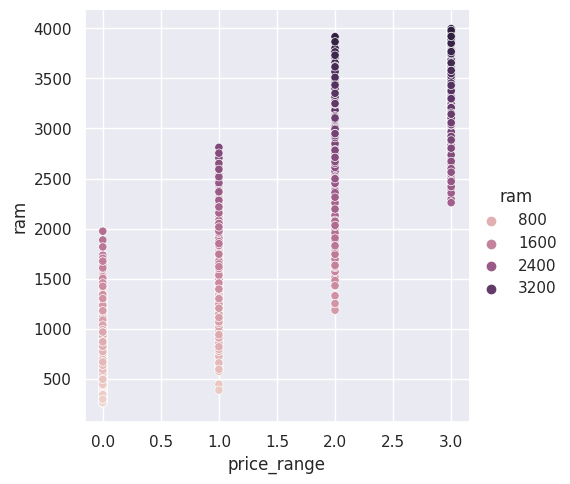

In [113]:
chart2b = sns.relplot(x=df['price_range'],
                     y= df['ram'],
                     hue=df['ram'],
                     legend='auto')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

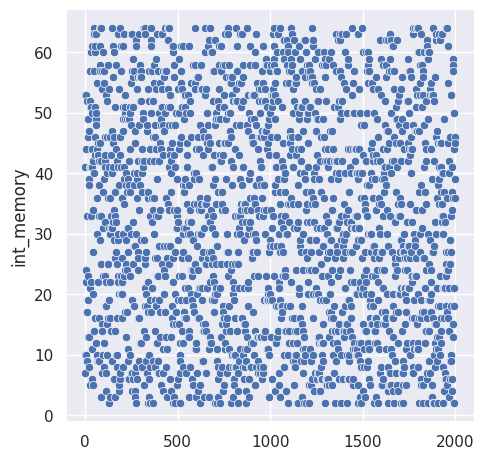

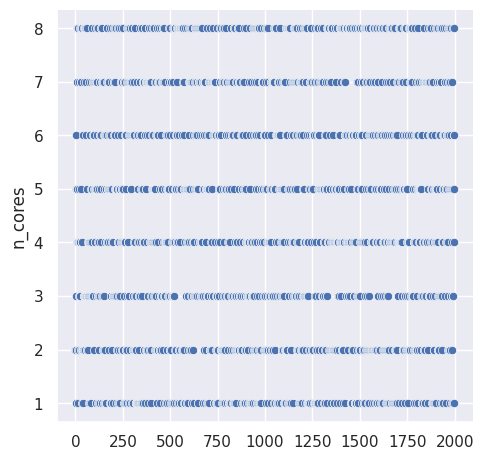

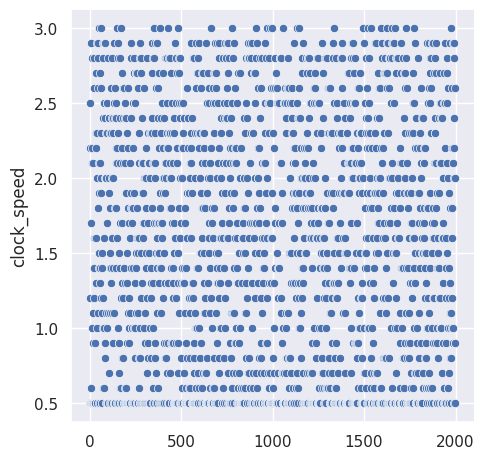

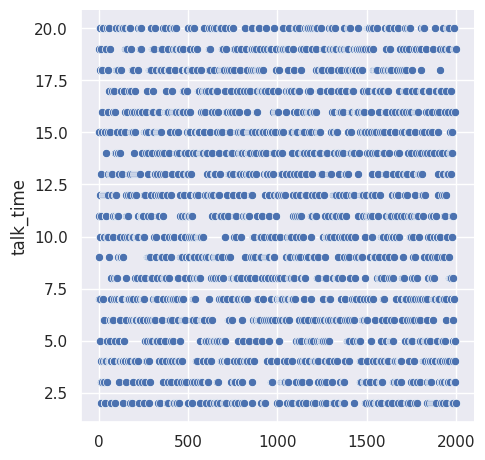

In [114]:
# Chart - 3 visualization code
cols_at_work = ['int_memory','n_cores','clock_speed','talk_time']
for i in cols_at_work:
  sns.relplot(df[i])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: ylabel='clock_speed'>

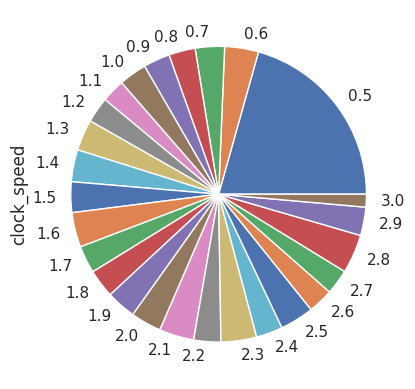

In [115]:
# Chart - 4 visualization code
chart4 = df.groupby('clock_speed')['clock_speed'].count()
chart4.plot(kind='pie')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='sc_w'>

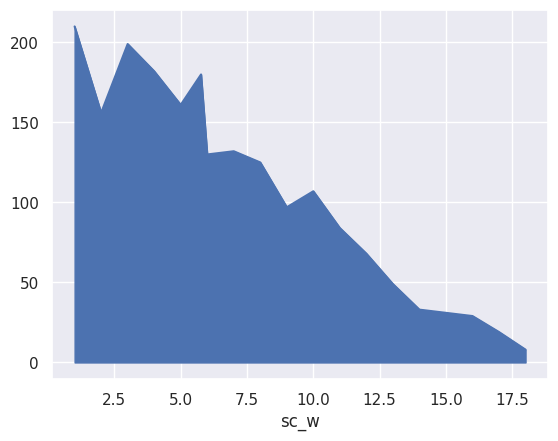

In [116]:
# Chart - 5 visualization code
temp = df.groupby('sc_w')['price_range'].count()
temp.plot(kind='area')

<Axes: xlabel='sc_h'>

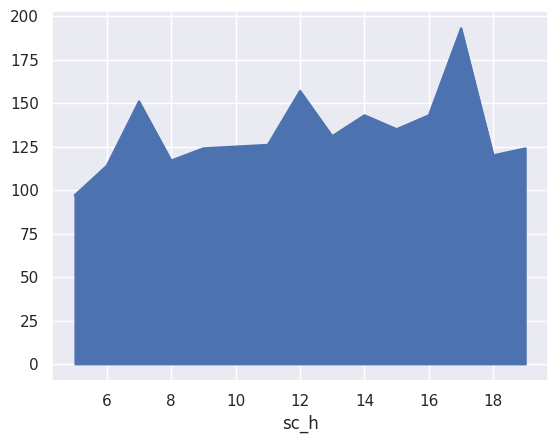

In [117]:
tempr = df.groupby('sc_h')['price_range'].count()
tempr.plot(kind='area')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='price_range', ylabel='clock_speed'>

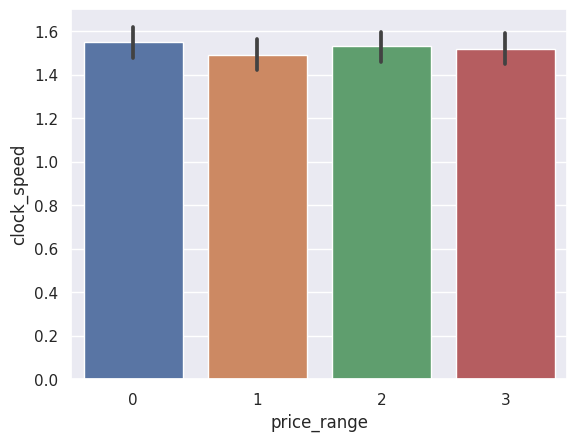

In [118]:
# Chart - 6 visualization code
sns.barplot(x=df['price_range'], y=df['clock_speed'])

<Axes: xlabel='price_range', ylabel='talk_time'>

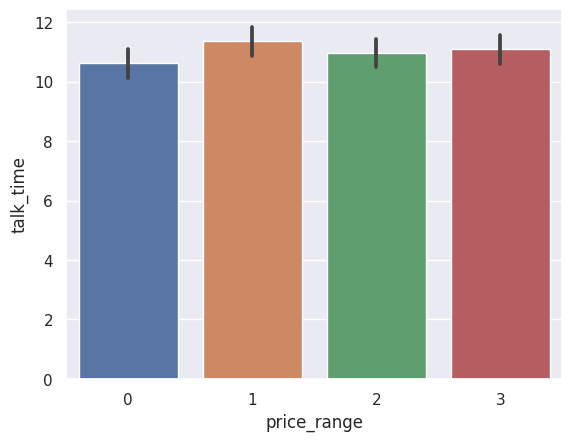

In [119]:
sns.barplot(x=df['price_range'], y=df['talk_time'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<ipython-input-120-5c6e85149949>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  chart7 = temp.pivot('n_cores','four_g').reset_index()


<Axes: xlabel='n_cores'>

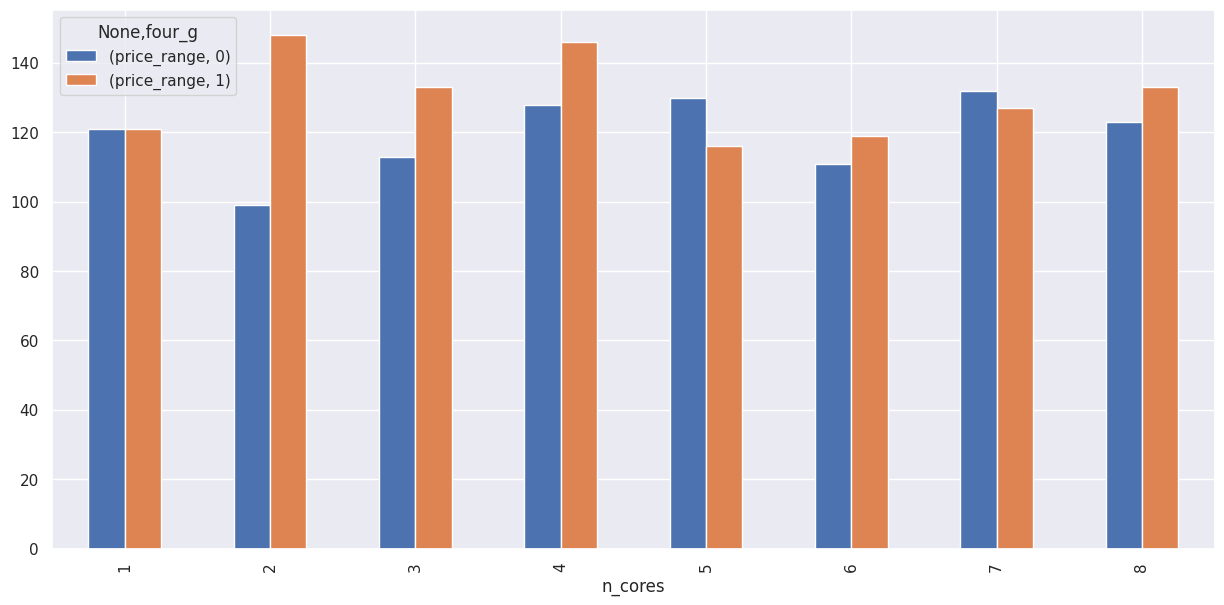

In [120]:
# Chart - 7 visualization code
temp = df.groupby(['n_cores','four_g'])['price_range'].count().reset_index()
chart7 = temp.pivot('n_cores','four_g').reset_index()
chart7.set_index('n_cores').plot(kind='bar',figsize=(15,7))

<ipython-input-121-83b8bb76f9c1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  chart7b = temp.pivot('n_cores','three_g').reset_index()


<Axes: xlabel='n_cores'>

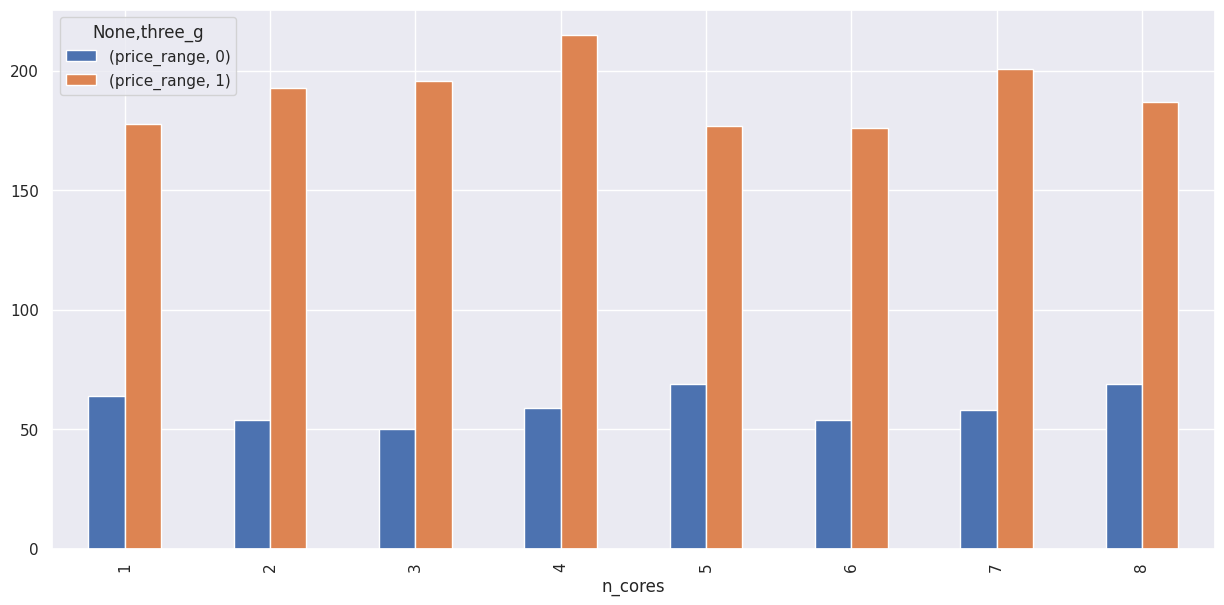

In [121]:
temp = df.groupby(['n_cores','three_g'])['price_range'].count().reset_index()
chart7b = temp.pivot('n_cores','three_g').reset_index()
chart7b.set_index('n_cores').plot(kind='bar',figsize=(15,7))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

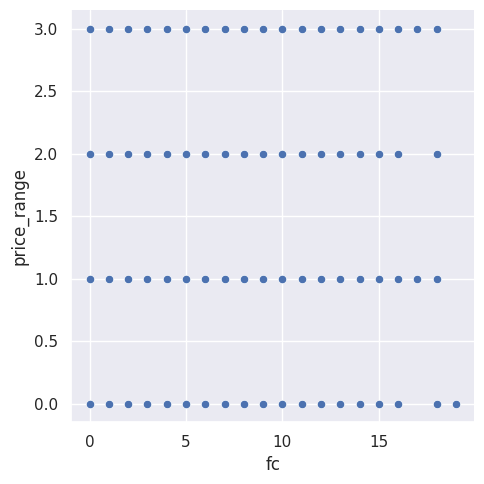

In [122]:
sns.relplot(x=df['fc'],y=df['price_range'])

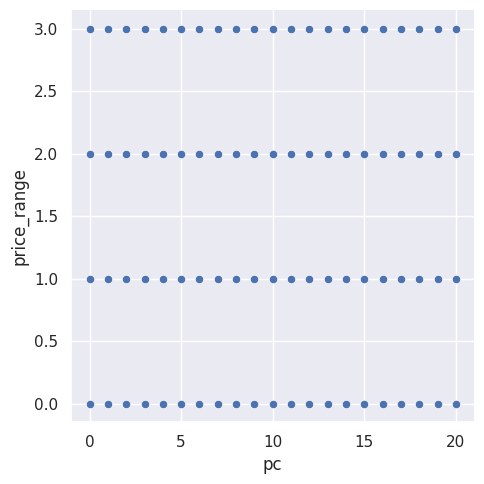

In [123]:
# Chart - 8 visualization code
sns.relplot(x=df['pc'],y=df['price_range'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='m_dep'>

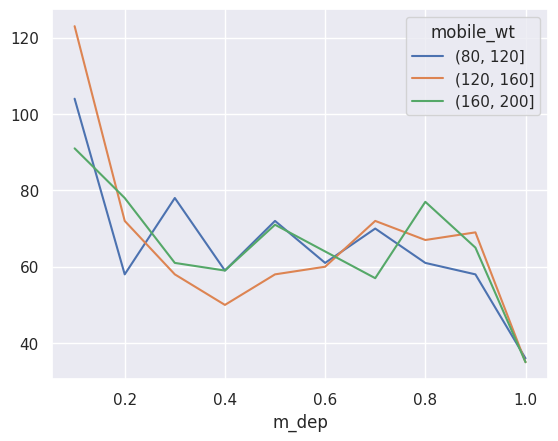

In [124]:
# Chart - 9 visualization code
mob_wt =pd.cut(df['mobile_wt'],(80,120,160,200))
sns.set()
df.pivot_table('price_range', index='m_dep', columns=mob_wt,aggfunc='count').plot()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: xlabel='n_cores'>

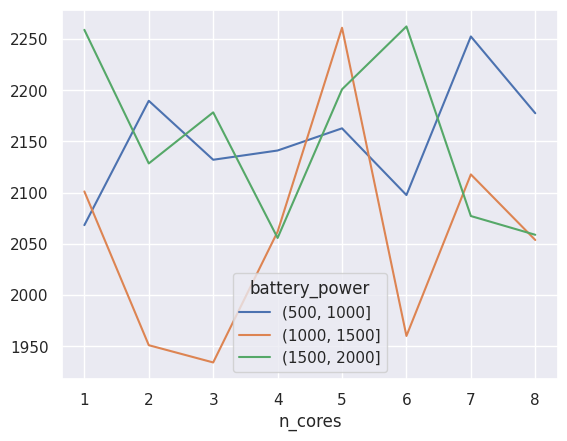

In [125]:
# Chart - 10 visualization code
batree = pd.cut(df['battery_power'],(500,1000,1500,2000))
df.pivot_table('ram',index='n_cores',columns=batree,aggfunc='mean').plot()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='dual_sim', ylabel='price_range'>

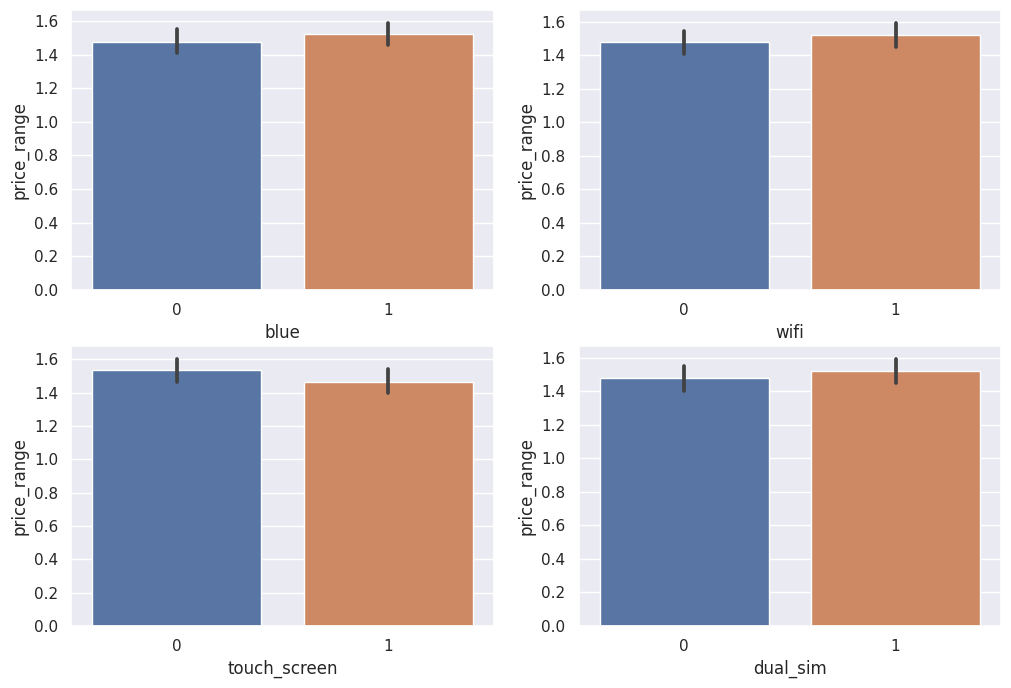

In [126]:
# Chart - 11 visualization code
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))
sns.barplot(data=df,x='blue',y='price_range',ax=ax1)
sns.barplot(data=df,x='wifi',y='price_range',ax=ax2)
sns.barplot(data=df,x='touch_screen',y='price_range',ax=ax3)
sns.barplot(data=df,x='dual_sim',y='price_range',ax=ax4)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [127]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [128]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

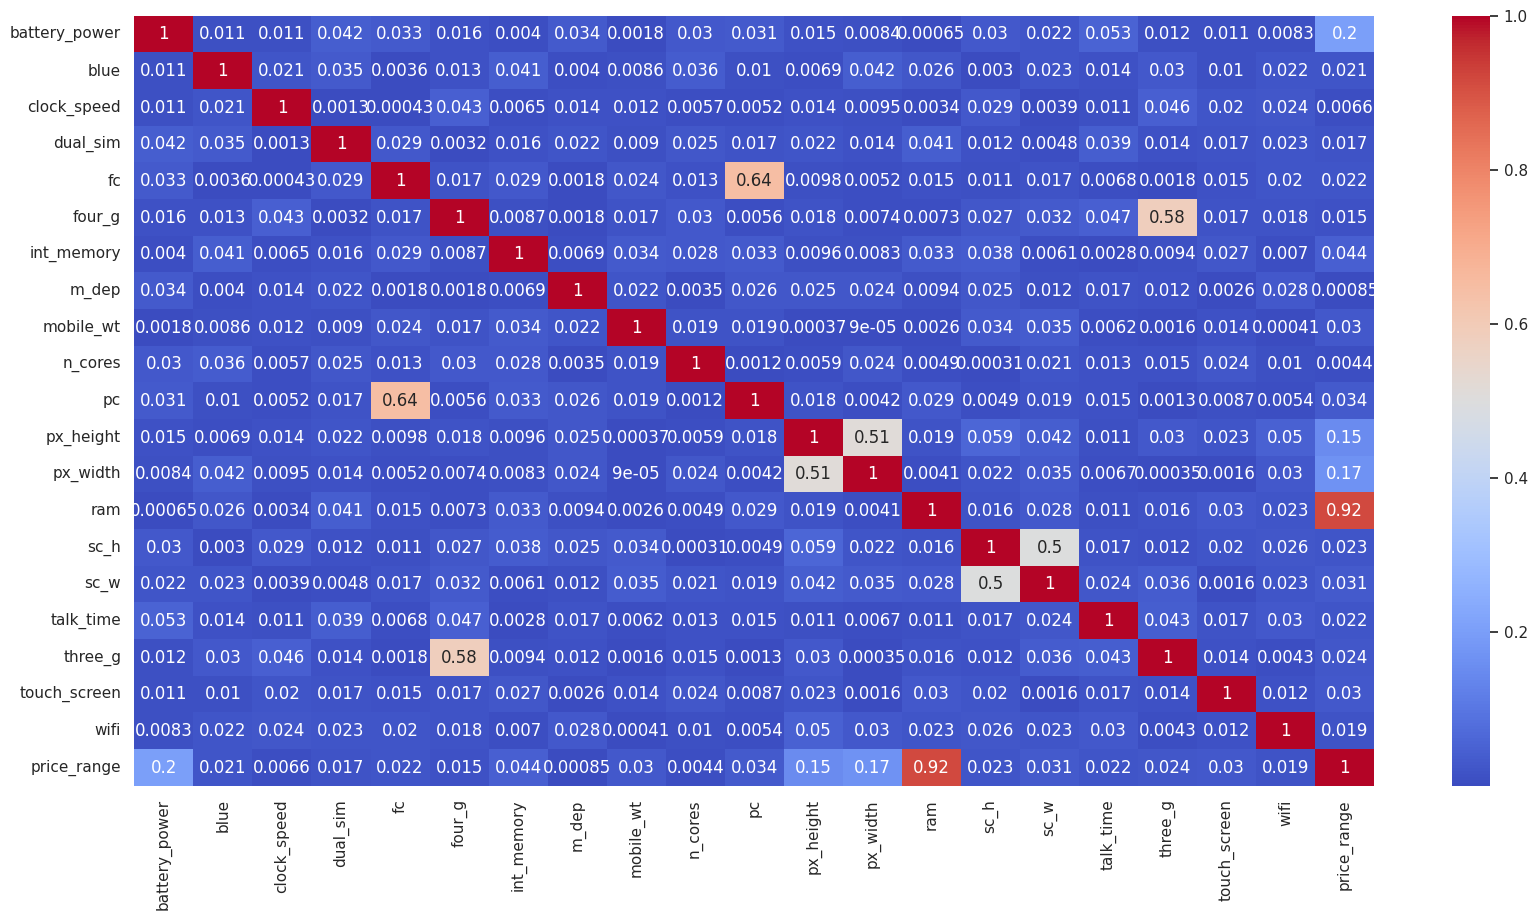

In [129]:
# Correlation Heatmap visualization code
correlation = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')


ram and price have correlation but cant remove ram as it is an important factor in deciding price range

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [130]:
# Pair Plot visualization code
plt.figure(figsize=(20,10))
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [131]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [132]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [133]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [134]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

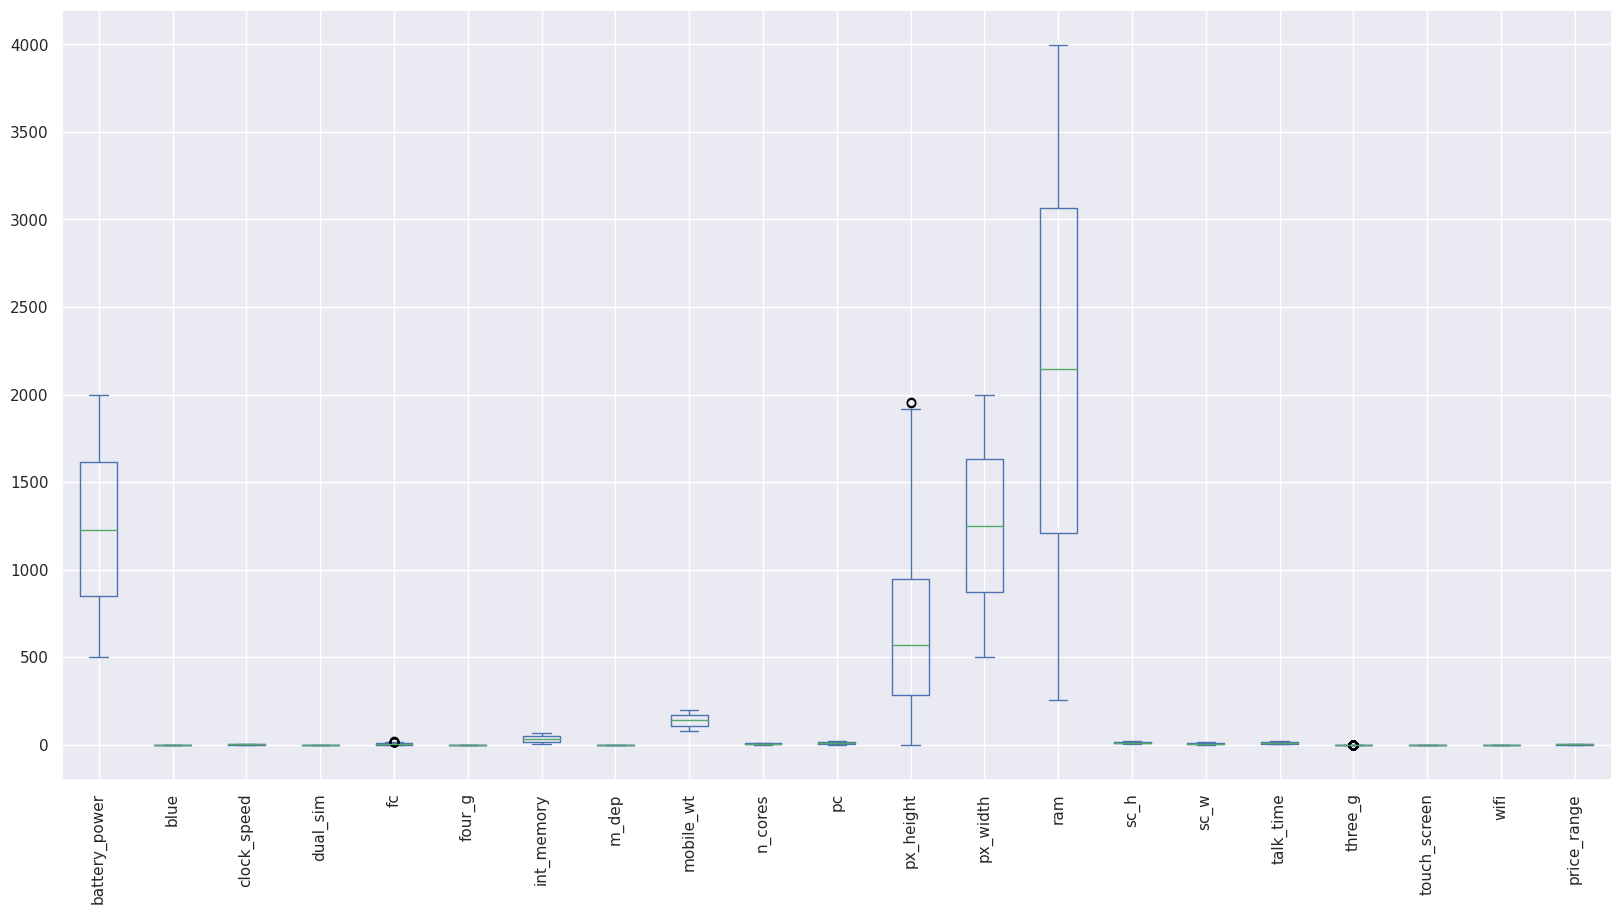

In [135]:
# Handling Outliers & Outlier treatments
h =  df.plot(kind='box',figsize = (20,10))
h.set_xticklabels(labels=df,rotation=90)
plt.show()


no outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [136]:
# Encode your categorical columns
#there is no need of encoding as there is no textual categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [137]:
# Expand Contraction

#### 2. Lower Casing

In [138]:
# Lower Casing

#### 3. Removing Punctuations

In [139]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [140]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [141]:
# Remove Stopwords

In [142]:
# Remove White spaces

#### 6. Rephrase Text

In [143]:
# Rephrase Text

#### 7. Tokenization

In [144]:
# Tokenization

#### 8. Text Normalization

In [145]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [146]:
# POS Taging

#### 10. Text Vectorization

In [147]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [148]:
# Manipulate Features to minimize feature correlation and create new features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

converting screen height and width into screen size and calculating size in inches

In [149]:
df['screen_size']= np.sqrt((df['sc_h']**2)+df['sc_w']**2)
df['screen_size']= round(df['screen_size']/2.54,2)

converting pixel height and width into pixel size

In [150]:
df['pixel_size'] = df['px_height']*df['px_width']

In [151]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'screen_size', 'pixel_size'],
      dtype='object')

#### 2. Feature Selection

In [152]:
# Select your features wisely to avoid overfitting

In [153]:
#dropping screen height and width colummns
df.drop(['sc_h','sc_w'], axis=1,inplace=True)

In [154]:
#dropping pixel height and width colummns
df.drop(['px_height','px_width'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<ipython-input-155-733f623bd668>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: ylabel='Density'>

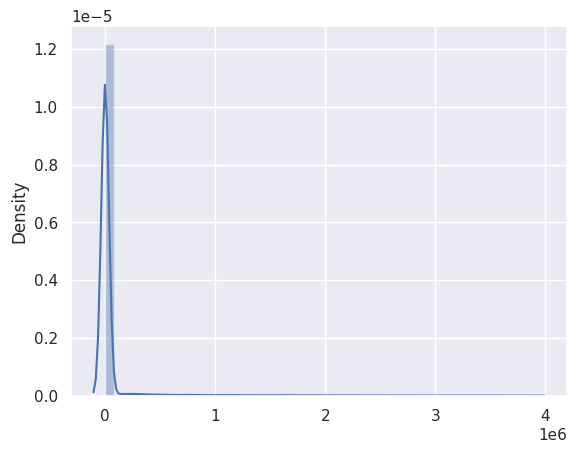

In [155]:
# Transform Your data
x = df.drop(['price_range'],axis=1)
y = df['price_range']

sns.distplot(x)

### 6. Data Scaling

In [156]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [157]:
x_std = std.fit_transform(x)

In [158]:
x_std

array([[-0.90259726, -0.9900495 ,  0.83077942, ...,  0.98609664,
        -0.54361994, -1.07475047],
       [-0.49513857,  1.0100505 , -1.2530642 , ..., -1.01409939,
         0.63028568,  1.07694173],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ..., -1.01409939,
        -0.58935652,  1.5209862 ],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ..., -1.01409939,
        -1.01114945,  0.61553436],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.98609664,
         1.29600705, -0.82147115],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.98609664,
         1.05716046, -0.65374959]])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [159]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [160]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.25, random_state = 12)

In [161]:
X_train.shape

(1500, 18)

In [162]:
y_train.shape

(1500,)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [163]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [164]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def c_matrix (y_test, y_pred, plt_title):
  confusion_m = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred))
  sns.heatmap(confusion_m, annot=True, cmap = 'GnBu' )
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title(plt_title)
  plt.show()
  return confusion_m

### ML Logistic Classifier

Accuracy score of logistic Classifier:  0.94
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       129
           1       0.95      0.94      0.94       131
           2       0.90      0.91      0.90       117
           3       0.93      0.95      0.94       123

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



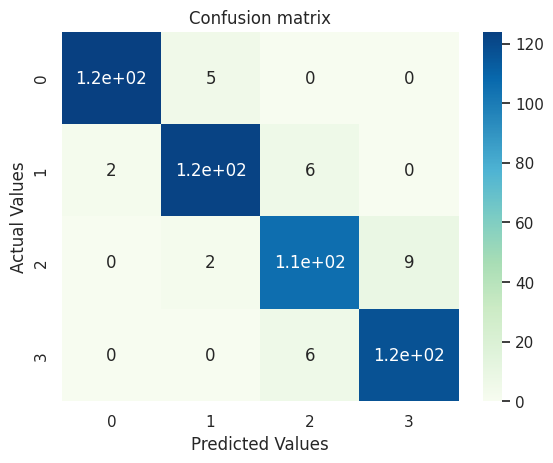

In [165]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


# Fit the Algorithm
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

# Predict on the model
print('Accuracy score of logistic Classifier: ', accuracy_score(y_test, lr_pred))
cofusion_matrix_LR = c_matrix(y_test,lr_pred, 'Confusion matrix')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [166]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [167]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [169]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [170]:
y_pred_knn = knn.predict(X_test)

Accuracy score of K neighbors:  0.466
              precision    recall  f1-score   support

           0       0.53      0.68      0.59       129
           1       0.32      0.33      0.32       131
           2       0.32      0.29      0.30       117
           3       0.75      0.55      0.64       123

    accuracy                           0.47       500
   macro avg       0.48      0.46      0.46       500
weighted avg       0.48      0.47      0.47       500



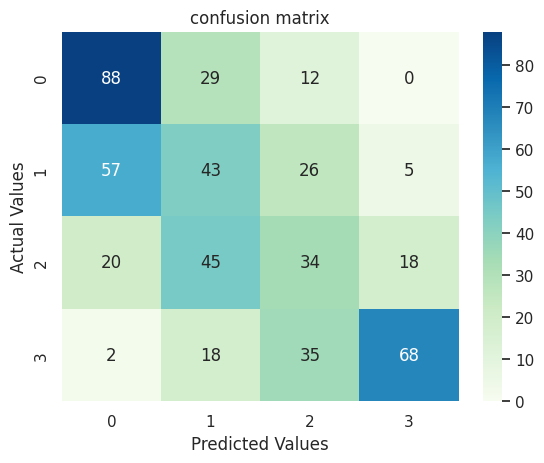

In [171]:
print('Accuracy score of K neighbors: ', accuracy_score(y_test, y_pred_knn))
confusion_matrix_knn = c_matrix(y_test, y_pred_knn, 'confusion matrix')

finding the optimum n_neighbor value

In [172]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 77}

In [173]:
# Fit the Algorithm
knn = KNeighborsClassifier(n_neighbors = 77)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=77)

In [174]:
# Predict on the model
y_pred_knn = knn.predict(X_test)

Accuracy score of K neighbors:  0.646
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       129
           1       0.57      0.49      0.52       131
           2       0.47      0.56      0.52       117
           3       0.78      0.71      0.74       123

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



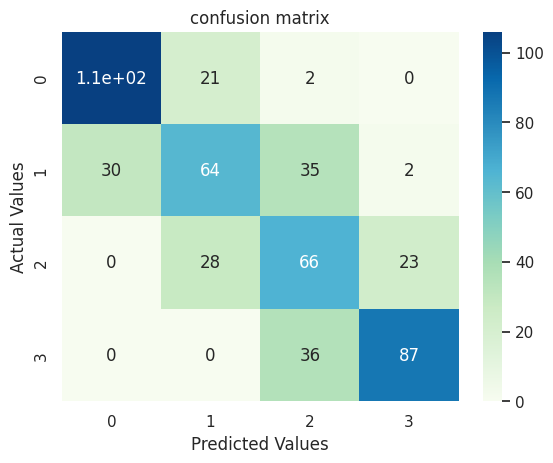

In [175]:
print('Accuracy score of K neighbors: ', accuracy_score(y_test, y_pred_knn))
confusion_matrix_knn = c_matrix(y_test, y_pred_knn, 'confusion matrix')

As you can see the accuracy score increased but at the value ok k=77 which is very big number

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [176]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [177]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML SVM

Accuracy score of Support Vector Machine:  0.874
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       129
           1       0.86      0.82      0.84       131
           2       0.74      0.86      0.80       117
           3       0.94      0.87      0.90       123

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.88       500



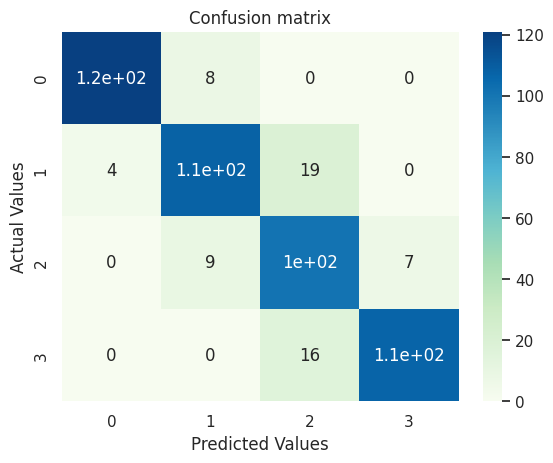

In [178]:
# ML Model - 3 Implementation
from sklearn.svm import SVC
svmachine = SVC()

# Fit the Algorithm
svmachine.fit(X_train, y_train)
svc_pred = svmachine.predict(X_test)

# Predict on the model
print('Accuracy score of Support Vector Machine: ', accuracy_score(y_test, svc_pred))
cofusion_matrix_svc = c_matrix(y_test,svc_pred, 'Confusion matrix')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [179]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [180]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid = {'C': [1,5,10,50,100],
              'gamma': [.1,.5,.25,1],
             'kernel':['rbf','poly','sigmoid','linear']}
GS = GridSearchCV(SVC(),param_grid,cv=5)

# Fit the Algorithm
GS.fit(X_train,y_train)
print('best parameters {}'.format(GS.best_params_))
print('best score {}'.format(GS.best_score_))

# Predict on the model

y_CV_pred = GS.predict(X_test)

best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
best score 0.9273333333333333


In [181]:
#Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_CV_pred)
mse = mean_squared_error(y_test, y_CV_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.072
r_square_value : 0.9427196700652996


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [182]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [183]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***